In [1]:

import os
import re
import cv2 # opencv library
import numpy as np
from os.path import isfile, join
import matplotlib.pyplot as plt
import glob


In [3]:
vidcap = cv2.VideoCapture('videoplayback.mp4')
success,image = vidcap.read()
count = 0
while success:
  cv2.imwrite("frames/%d.png" % count, image)     # save frame as png file      
  success,image = vidcap.read()
  count += 1
    
# get file names of the frames
col_frames = os.listdir('frames/')

# sort file names
col_frames.sort(key=lambda f: int(re.sub('\D', '', f)))

# empty list to store the frames
col_images=[]

for i in col_frames:
    # read the frames
    img = cv2.imread('frames/'+i)
    # append the frames to the list
    col_images.append(img)

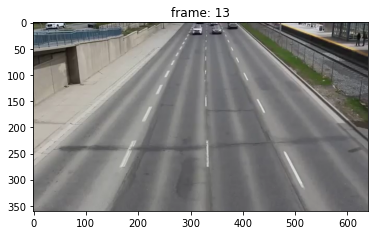

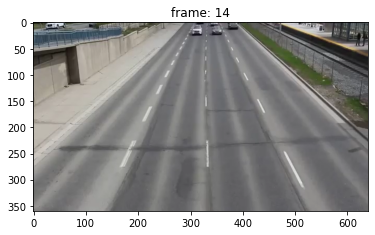

In [4]:
# plot 13th frame
i = 13

for frame in [i, i+1]:
    plt.imshow(cv2.cvtColor(col_images[frame], cv2.COLOR_BGR2RGB))
    plt.title("frame: "+str(frame))
    plt.show()

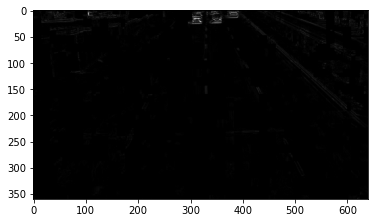

In [5]:
# convert the frames to grayscale
grayA = cv2.cvtColor(col_images[i], cv2.COLOR_BGR2GRAY)
grayB = cv2.cvtColor(col_images[i+1], cv2.COLOR_BGR2GRAY)

# plot the image after frame differencing
plt.imshow(cv2.absdiff(grayB, grayA), cmap = 'gray')
plt.show()

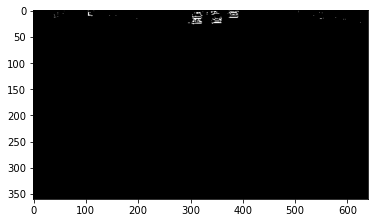

In [6]:
diff_image = cv2.absdiff(grayB, grayA)

# perform image thresholding
ret, thresh = cv2.threshold(diff_image, 30, 255, cv2.THRESH_BINARY)

# plot image after thresholding
plt.imshow(thresh, cmap = 'gray')
plt.show()

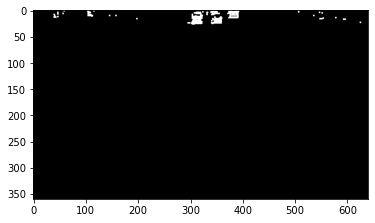

In [7]:
# apply image dilation
kernel = np.ones((3,3),np.uint8)
dilated = cv2.dilate(thresh,kernel,iterations = 1)

# plot dilated image
plt.imshow(dilated, cmap = 'gray')
plt.show()

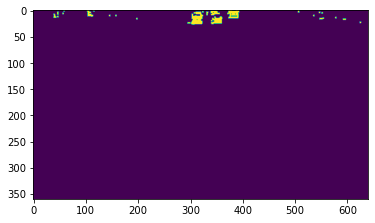

In [8]:
# plot vehicle detection zone
plt.imshow(dilated)
cv2.line(dilated, (0, 80),(650,80),(100, 0, 0))
plt.show()
